### Product Category

Analyzing wherether or not `product_category` have impact on delivery time.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import read_product_delivery

In [12]:
df = read_product_delivery()
df.head()

,order_id,product_id,quantity,seller_id,price,freight_value,product_category_name,order_purchase_timestamp,delivered_carrier_time,carrier_to_customer_time,total_delivery_time
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,1,48436dade18ac8b2bce089ec2a041202,58.90,13.29,cool_stuff,2017-09-13 08:59:02,6 days 09:35:14,1 days 05:09:32,7 days 14:44:46
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,1,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,pet_shop,2017-04-26 10:53:06,8 days 03:41:54,8 days 01:29:24,16 days 05:11:18
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,1,5b51032eddd242adc84c38acab88f23d,199.00,17.87,moveis_decoracao,2018-01-14 14:33:31,1 days 22:03:17,6 days 00:42:28,7 days 22:45:45
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,1,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,perfumaria,2018-08-08 10:00:35,2 days 03:27:25,4 days 00:04:39,6 days 03:32:04
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,1,df560393f3a51e74553ab94004ba5c87,199.90,18.14,ferramentas_jardim,2017-02-04 13:57:51,11 days 19:48:18,13 days 06:56:22,25 days 02:44:40


In [13]:
df['total_days'] = df['total_delivery_time'].dt.days

In [14]:
"""
First, group by category and calculate the "Big Three" metrics: 
    Mean (Average), 
    Median (Middle ground, resistant to outliers), 
    and Standard Deviation (Consistency).
"""
df = df.groupby('product_category_name')['total_days'].agg(['mean', 'median', 'std', 'count']).sort_values(by='median', ascending=False)

"""
Focus only on categories with enough data (e.g., more than 30 orders)
"""
df = df[df['count'] > 30]

"""
add coefficient of variation
"""
df['cv'] = df['std'] / df['mean']
df.head(5)

,mean,median,std,count,cv
product_category_name,,,,,
moveis_escritorio,20.188620,18.0,13.222692,1283,0.654958
artigos_de_natal,15.062992,13.0,12.363379,127,0.820778
fashion_calcados,14.984252,13.0,8.549308,254,0.570553
moveis_sala,13.358670,12.0,9.376623,421,0.701913
eletronicos,12.460230,11.0,9.070494,2527,0.727956


In [15]:
df.tail(5)

,mean,median,std,count,cv
product_category_name,,,,,
utilidades_domesticas,10.619348,8.0,9.072723,5861,0.854358
alimentos,9.368778,7.0,11.317605,442,1.208013
portateis_casa_forno_e_cafe,9.397260,7.0,6.769498,73,0.720369
artigos_de_festas,8.578947,7.0,5.485271,38,0.639387
livros_importados,7.785714,6.5,6.175359,56,0.793165


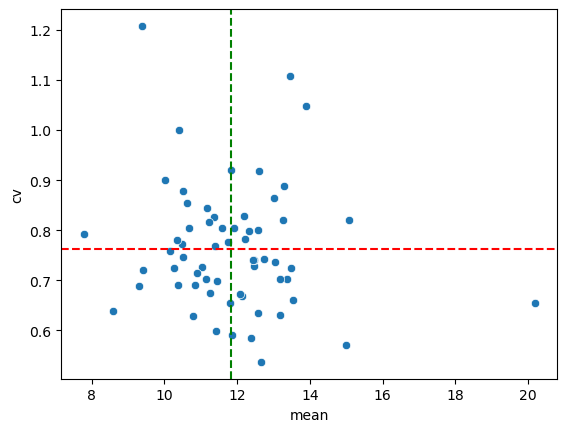

In [18]:
# Create a scatter plot
sns.scatterplot(data=df, x="mean", y="cv")

y_mean = df['cv'].mean()
x_mean = df['mean'].mean()

# Add horizontal line at the mean of y
plt.axhline(y=y_mean, color='r', linestyle='--')

# Add vertical line at the mean of x
plt.axvline(x=x_mean, color='g', linestyle='--')

# Display the plot
plt.show()

### Finding
1. The "No Silver Bullet" Finding
If the categories were clustered in one quadrant (e.g., only "Heavy Furniture" was slow), the fix would be easy: Fix the furniture logistics. * Your Finding: Since slow and unstable deliveries happen across all categories (from small electronics to large appliances), the root cause is platform-wide.

Business Insight: Improving a single warehouse department or switching one specialized carrier won't solve the problem. You are looking at a fundamental breakdown in the core fulfillment engine.

2. Decoupling Product from Process
Equal distribution proves that the "Sunday Bottleneck" and the "Night-time Reporting Lag" you found earlier are "product-agnostic."

The Interpretation: It doesn't matter if a customer buys a t-shirt or a refrigerator; if they buy it on Sunday, it’s going to take 24 days.

The Argument: This strengthens your previous findings. It proves that the "Weekend Wall" is so dominant that it "washes out" any differences between product types.

3. The "Standard Deviation" is the Real Story
In an equally distributed quadrant, look at the "Center Point" of your CV.

If almost all categories have a CV above 0.5 (as you found), the "equal distribution" just means the entire company is operating in a high-variance state.

You aren't comparing "Good vs. Bad" categories; you are comparing "Bad vs. Worse."

`
"Systemic Instability across Product Lines" "An analysis of 73 product categories shows an equal distribution across the performance quadrants. This indicates that delivery delays are not tied to specific product characteristics (like size or fragility) but are instead driven by overarching operational bottlenecks, such as the Sunday processing gap and inconsistent carrier handovers."`